# sheet1分析

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

In [4]:
import os 
os.chdir(r"D:\美团商分大赛")

In [5]:
df_sheet1 = pd.read_excel(r'.\05 美团业务选题_小象超市门店规划相关_数据表_脱敏后.xlsx',sheet_name='表1_门店分站龄的订单规模表')

In [6]:
df_sheet1.head()

,门店id,开业月份,站点站龄,周期天数,站日均订单量,距离1.5km以下日均订单量,距离1.5~2.1km日均订单量,距离2.1~2.8km日均订单量,距离2.8~3.8km日均订单量,距离3.8km以上日均订单量
0,10000688,202304,M00,30,537,292,172,73,0,0
1,10000688,202304,M01,30,504,226,155,123,0,0
2,10000688,202304,M02,30,490,236,146,108,0,0
3,10000688,202304,M03,30,509,260,144,105,0,0
4,10000688,202304,M04,30,510,263,139,108,0,0


In [7]:
#站日均订单量分布图
#descriptive statistics summary
df_sheet1['站日均订单量'].describe()

count     783.000000
mean      485.535121
std       134.547659
min       225.000000
25%       389.500000
50%       460.000000
75%       559.000000
max      1013.000000
Name: 站日均订单量, dtype: float64

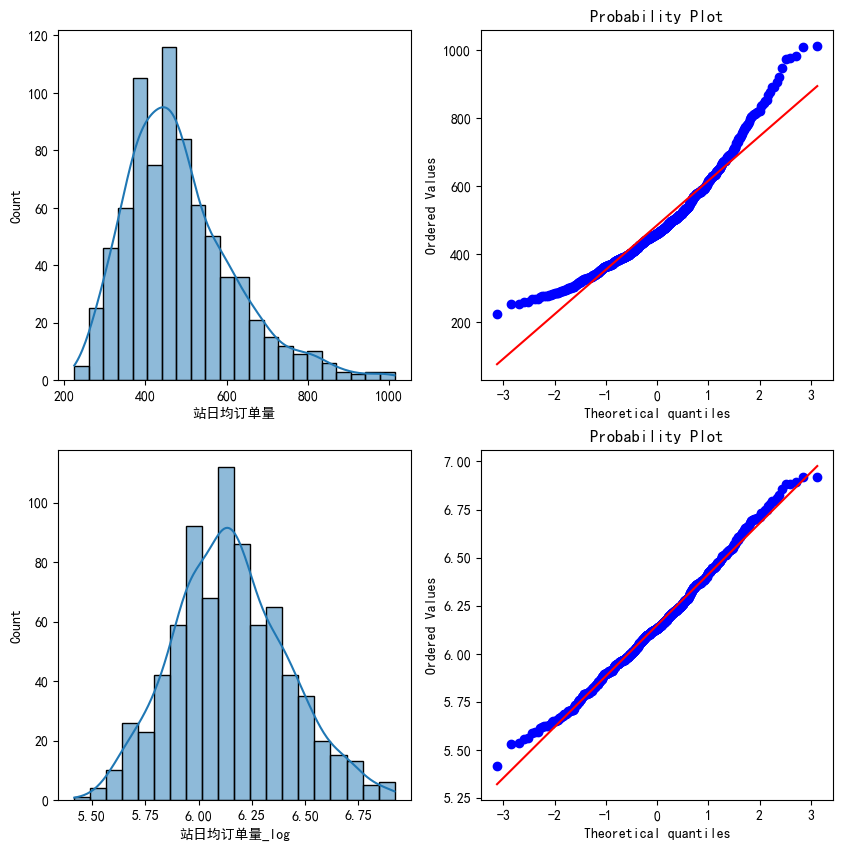

In [8]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
sns.histplot(data=df_sheet1, x='站日均订单量', kde=True,ax=axes[0][0])  # 添加 kde 曲线可选
res = stats.probplot(df_sheet1['站日均订单量'], dist=norm, plot=axes[0][1])
#log
df_sheet1['站日均订单量_log'] = np.log(df_sheet1['站日均订单量'])
sns.histplot(data=df_sheet1, x='站日均订单量_log', kde=True,ax=axes[1][0])
res = stats.probplot(df_sheet1['站日均订单量_log'], dist=norm, plot=axes[1][1]) 
plt.show()

In [9]:
#偏态分布，左偏，

In [10]:
#通过对数变换，站日均订单量满足了正态性

## 异常值

In [11]:
saleprice_scaled = StandardScaler().fit_transform(df_sheet1['站日均订单量_log'].values.reshape(-1, 1))
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.77654264]
 [-2.33257235]
 [-2.31764032]
 [-2.24385114]
 [-2.22926436]
 [-2.12870112]
 [-2.10045274]
 [-2.10045274]
 [-2.03074054]
 [-2.00321122]]

outer range (high) of the distribution:
[[2.43715184]
 [2.43715184]
 [2.50027612]
 [2.56236497]
 [2.67162126]
 [2.77004763]
 [2.78168864]
 [2.81255744]
 [2.90368156]
 [2.9186579 ]]


In [12]:
#异常值分析？

# 纵向时间线分析

In [13]:
store_count = df_sheet1['门店id'].nunique()
print(store_count)

store_month_counts = df_sheet1.groupby('门店id')['站点站龄'].nunique().reset_index()
store_month_counts.columns = ['门店id', '总站龄']
print(store_month_counts)

53
        门店id  总站龄
0   10000688   22
1   10000690   11
2   10000691   22
3   10000692   21
4   10000693   21
5   10000694   21
6   10000695   21
7   10000702   21
8   10000735   20
9   10000736   20
10  10000737   19
11  10000738   20
12  10000739   20
13  10000749   20
14  10000757   19
15  10000758   18
16  10000770   19
17  10000771   19
18  10000772   18
19  10000801   18
20  10000802   18
21  10000820    6
22  10000822   17
23  10000839   17
24  10000843   17
25  10000849   17
26  10000861   16
27  10000867   16
28  10000868   15
29  10000869   11
30  10000870   15
31  10000885   12
32  10000886   15
33  10000888   14
34  10000905   15
35  10000919   10
36  10000920   14
37  10000921   14
38  10000928   14
39  10000929   14
40  10000930   14
41  10000936   13
42  10000957   11
43  10000969    9
44  10000972    8
45  10000973    8
46  10000974    8
47  10000983    8
48  10000988    8
49  10000990    8
50  10000991    7
51  10001038    3
52  10001088    1


In [14]:
#某门店站龄-销量柱状图
def time_order(store_id):

    # 只取一个门店的数据（比如 10000688）
    df_store = df_sheet1[df_sheet1['门店id'] == store_id]

    # 按照站龄顺序排序（M00 ~ M11）
    df_store = df_store.sort_values(by='站点站龄')

    # 提取横轴和纵轴数据
    x = df_store['站点站龄']
    y = df_store['站日均订单量_log']

    # 绘图
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel('month')
    plt.ylabel('order num')
    plt.title(f'{store_id} time-order ')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [15]:
#store_month_counts['门店id'].apply(time_order)

In [16]:
#做相关性分析

In [17]:
#依照实际月份

In [18]:
#某门店月份-销量柱状图
def compute_site_month(df):
    # 将站点站龄中的数字提取出来，比如 M00 -> 0, M01 -> 1
    df['站点站龄数值'] = df['站点站龄'].str.extract(r'M(\d+)').astype(int)

    # 将开业月份转为 datetime 类型
    df['开业月份_dt'] = pd.to_datetime(df['开业月份'].astype(str), format='%Y%m').dt.to_period('M')

    # 加上站点站龄数值（以月份为单位）
    df['站点月份_dt'] = df['开业月份_dt'] + df['站点站龄数值'].apply(lambda x: pd.offsets.MonthEnd(int(x)))
    df['站点月份'] = df['站点月份_dt'].astype(str).str[-2:]


In [19]:
compute_site_month(df_sheet1)

In [20]:
def month_order(store_id):

    # 只取一个门店的数据（比如 10000688）
    df_store = df_sheet1[df_sheet1['门店id'] == store_id]

    # 按照站龄顺序排序（M00 ~ M11）
    df_store = df_store.sort_values(by='站点月份_dt',ascending=False)

    # 提取横轴和纵轴数据
    x = df_store['站点月份'].str[-2:]
    y = df_store['站日均订单量_log']

    # 绘图
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel('month')
    plt.ylabel('order num')
    plt.title(f'{store_id} time-order ')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

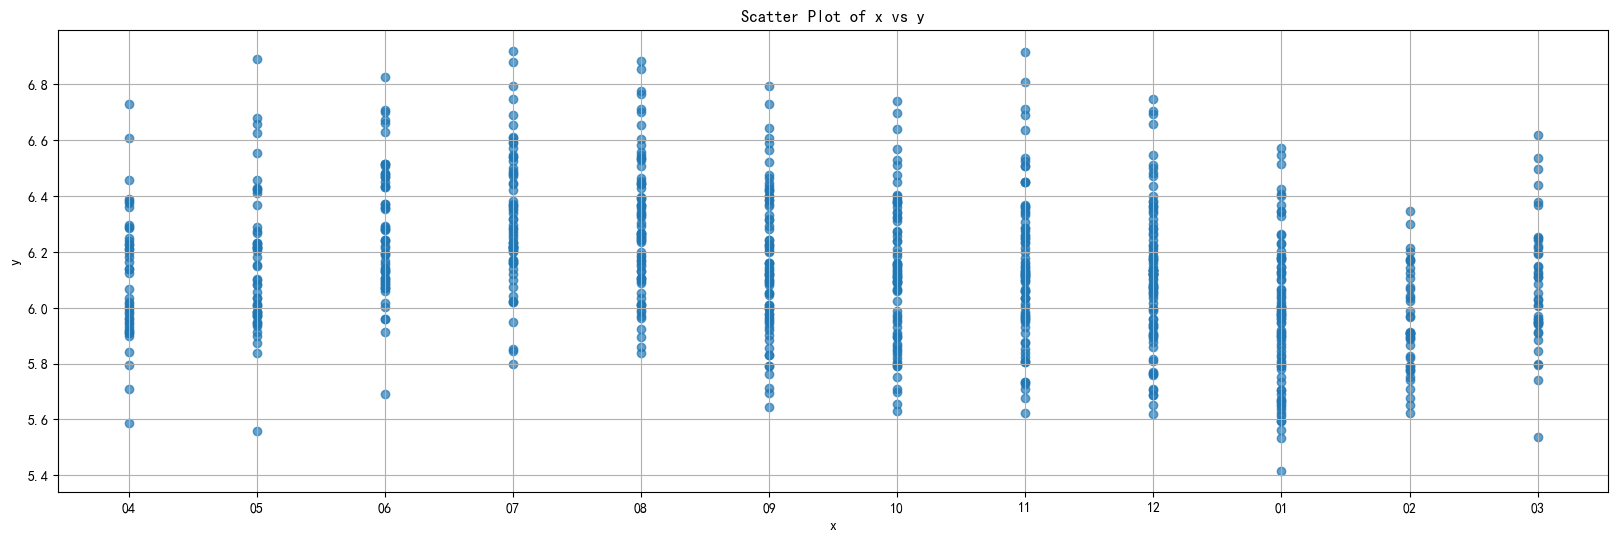

In [21]:
#散点图（站点月份）
# 假设你已经有一个 DataFrame，列名为 'x' 和 'y'
# 例子：
# df = pd.DataFrame({'x': [...], 'y': [...]})

plt.figure(figsize=(20, 6))
plt.scatter(df_sheet1['站点月份'], df_sheet1['站日均订单量_log'], alpha=0.7)
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


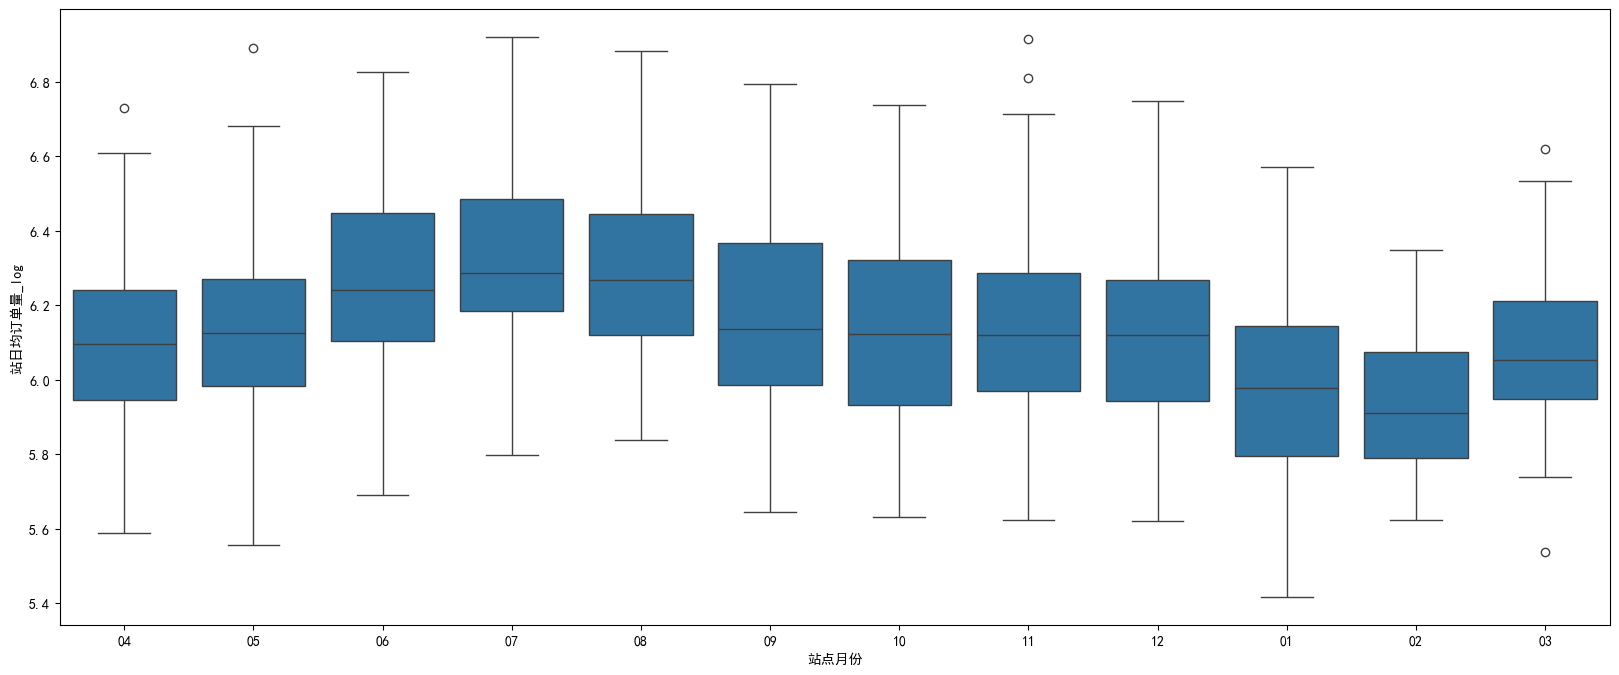

In [22]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x='站点月份', y='站日均订单量_log', data=df_sheet1)
plt.show()

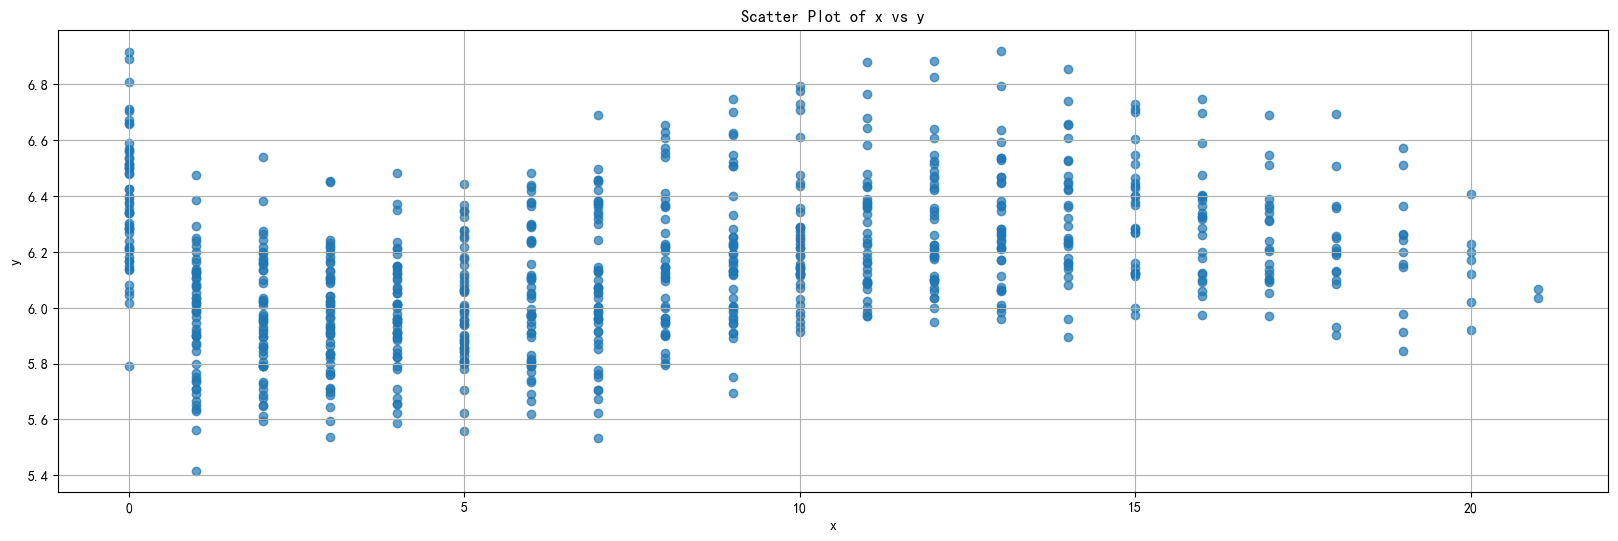

In [23]:
#散点图（站点站龄数值）
# 假设你已经有一个 DataFrame，列名为 'x' 和 'y'
# 例子：
# df = pd.DataFrame({'x': [...], 'y': [...]})

plt.figure(figsize=(20, 6))
plt.scatter(df_sheet1['站点站龄数值'], df_sheet1['站日均订单量_log'], alpha=0.7)
plt.title('Scatter Plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


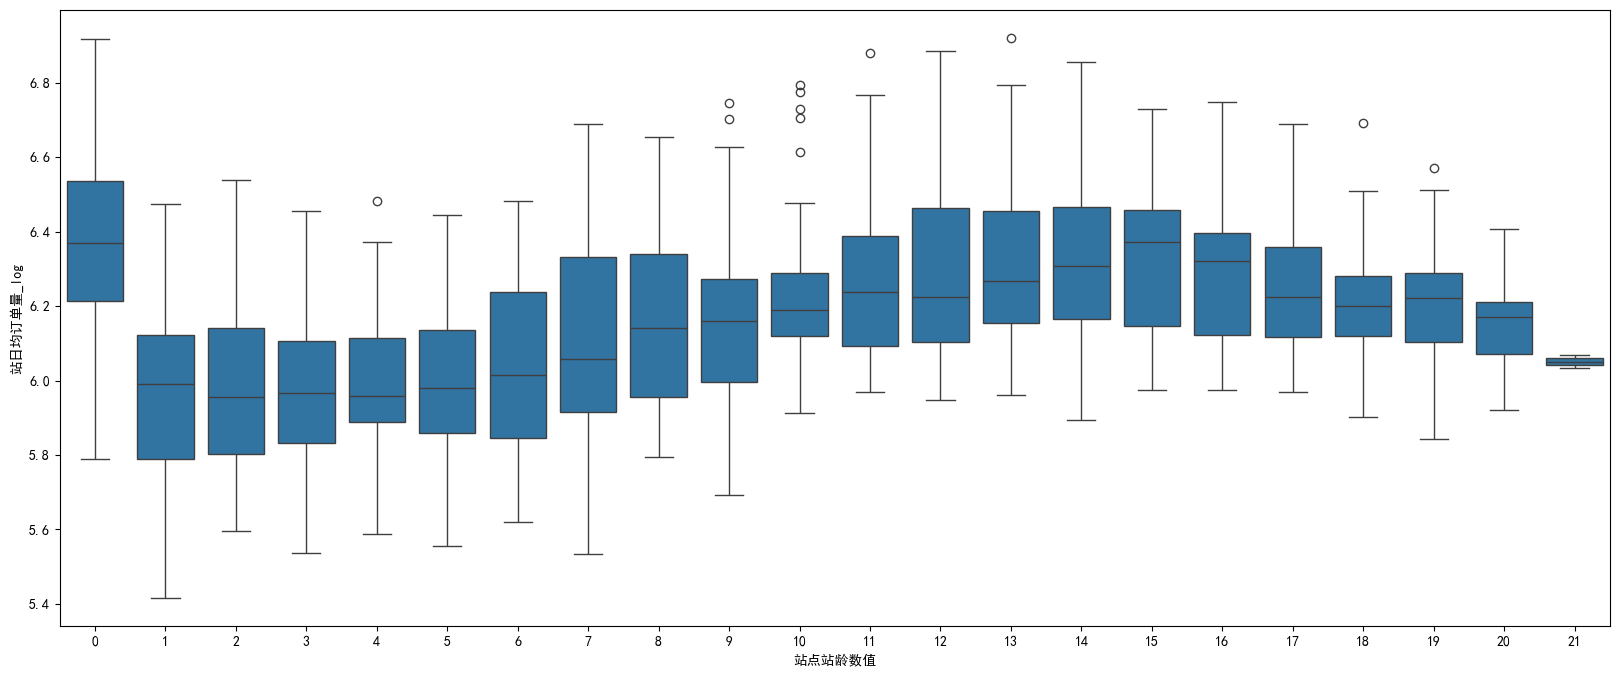

In [24]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x='站点站龄数值', y='站日均订单量_log', data=df_sheet1)
plt.show()

In [25]:
df_sheet1.columns

Index(['门店id', '开业月份', '站点站龄', '周期天数', '站日均订单量', '距离1.5km以下日均订单量',
       '距离1.5~2.1km日均订单量', '距离2.1~2.8km日均订单量', '距离2.8~3.8km日均订单量',
       '距离3.8km以上日均订单量', '站日均订单量_log', '站点站龄数值', '开业月份_dt', '站点月份_dt', '站点月份'],
      dtype='object')

In [26]:
## 消除季节项影响
month_order = df_sheet1['站点月份'].nunique()
print(month_order)

df_month = df_sheet1.groupby('站点月份')['站日均订单量_log'].mean().reset_index()
df_month.columns = ['站点月份', '站日均订单量_log_mean']
print(df_month)
df_sheet1 = pd.merge(left=df_sheet1,right=df_month,how='left',on='站点月份')

12
   站点月份  站日均订单量_log_mean
0    01         5.978076
1    02         5.946885
2    03         6.083559
3    04         6.109245
4    05         6.162230
5    06         6.275558
6    07         6.325108
7    08         6.296793
8    09         6.166482
9    10         6.127903
10   11         6.144199
11   12         6.119706


In [27]:
df_sheet1['销量-season'] = df_sheet1['站日均订单量_log']-df_sheet1['站日均订单量_log_mean']

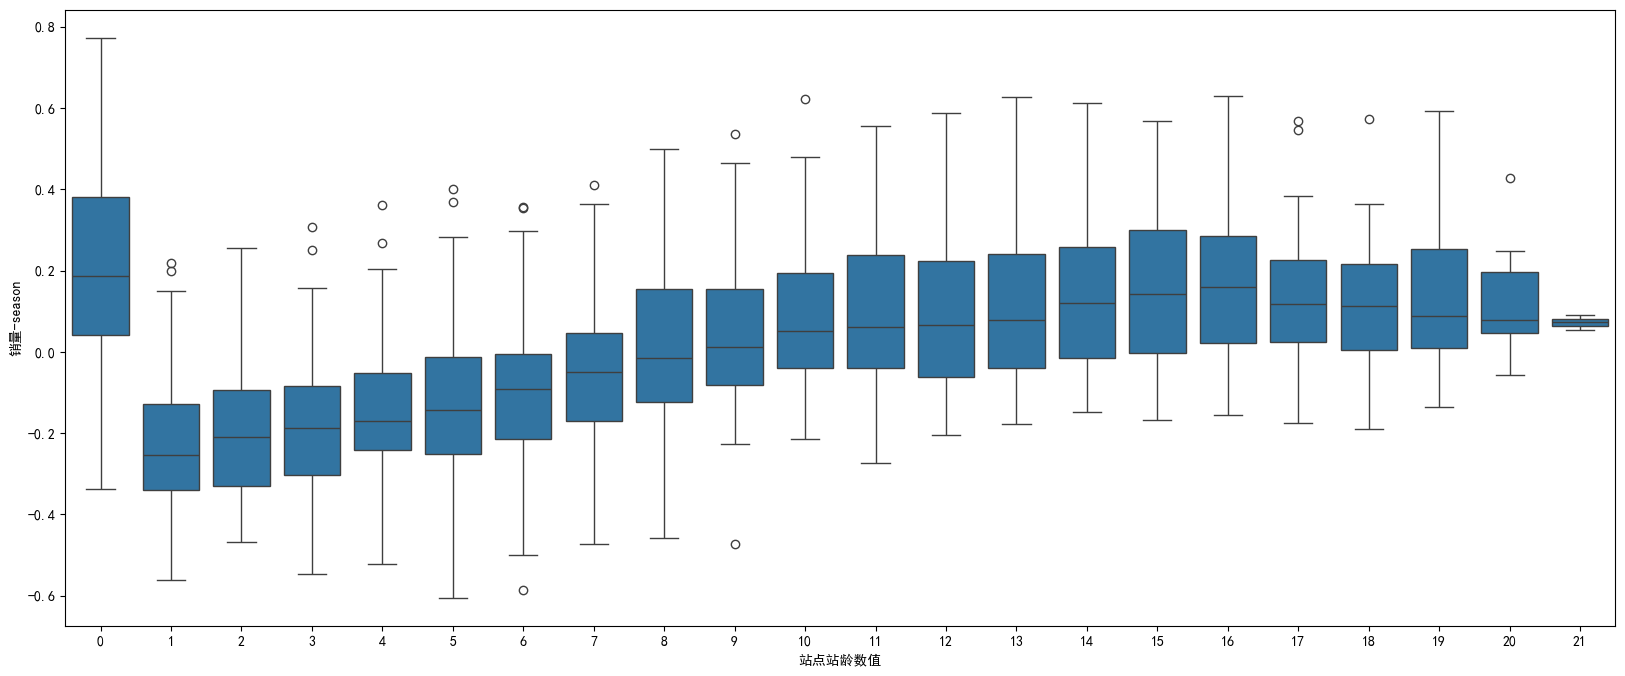

In [28]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x='站点站龄数值', y='销量-season', data=df_sheet1)
plt.show()

In [29]:
#假设检验

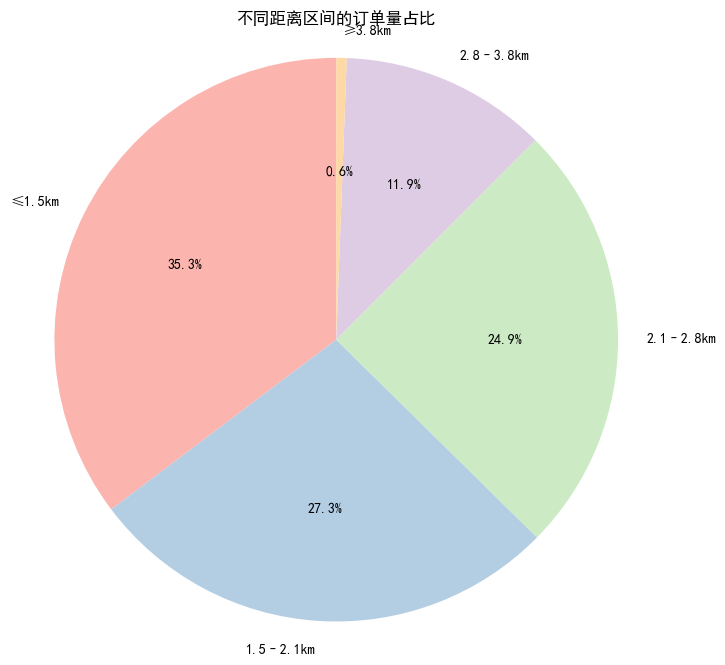

In [30]:
#饼图
# 标签和对应的订单量
labels = ['≤1.5km', '1.5–2.1km', '2.1–2.8km', '2.8–3.8km', '≥3.8km']
order_volume = [df_sheet1['距离1.5km以下日均订单量'].sum(),df_sheet1['距离1.5~2.1km日均订单量'].sum() , df_sheet1['距离2.1~2.8km日均订单量'].sum(),df_sheet1['距离2.8~3.8km日均订单量'].sum(), df_sheet1['距离3.8km以上日均订单量'].sum()]

# 配色方案可选（自动或自定义）
colors = plt.cm.Pastel1(range(len(labels)))

# 绘图
plt.figure(figsize=(8, 8))
plt.pie(order_volume, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('不同距离区间的订单量占比')
plt.axis('equal')  # 保证为圆形
plt.show()


# sheet2分析

## 横向特征分析

In [50]:
df_sheet2 = pd.read_excel(r'.\05 美团业务选题_小象超市门店规划相关_数据表_脱敏后.xlsx',sheet_name='表2_门店基础信息表')

In [54]:
store_count = df_sheet1['门店id'].nunique()
print(store_count)

store_order_counts = df_sheet1.groupby('门店id')['站日均订单量'].mean()
store_order_counts.columns = ['门店id', '站日均订单量']
print(store_order_counts)

53
门店id
10000688    498.363636
10000690    407.090909
10000691    425.136364
10000692    470.142857
10000693    468.190476
10000694    455.380952
10000695    567.285714
10000702    519.047619
10000735    462.700000
10000736    615.300000
10000737    500.947368
10000738    418.950000
10000739    541.900000
10000749    378.650000
10000757    400.105263
10000758    490.833333
10000770    476.000000
10000771    410.947368
10000772    428.777778
10000801    747.000000
10000802    490.833333
10000820    425.166667
10000822    431.058824
10000839    568.588235
10000843    410.882353
10000849    661.294118
10000861    660.812500
10000867    400.375000
10000868    407.866667
10000869    429.181818
10000870    586.466667
10000885    459.833333
10000886    549.066667
10000888    409.214286
10000905    451.200000
10000919    328.100000
10000920    529.714286
10000921    445.785714
10000928    456.857143
10000929    555.357143
10000930    492.285714
10000936    462.230769
10000957    553.000000
100

In [55]:
df_sheet2 = pd.merge(left=df_sheet2,right=store_order_counts,how='left',on='门店id')
df_sheet2 = pd.merge(left=df_sheet2,right=store_month_counts,how='left',on='门店id')
df_sheet2['站日均订单量_log'] = np.log(df_sheet2['站日均订单量'])

In [34]:
df_sheet2['美团月活跃用户数_仅工作_L3'] = df_sheet2['美团月活跃用户数_仅工作']*df_sheet2['美团月活_仅工作_L3及以下占比']  
df_sheet2['美团月活跃用户数_仅工作_L4'] = df_sheet2['美团月活跃用户数_仅工作']*df_sheet2['美团月活_仅工作_L4占比']  
df_sheet2['美团月活跃用户数_仅工作_L5'] = df_sheet2['美团月活跃用户数_仅工作']*df_sheet2['美团月活_仅工作_L5占比']  
df_sheet2['美团月活跃用户数_居住&工作_L3'] = df_sheet2['美团月活跃用户数_居住&工作']*df_sheet2['美团月活_工作&居住_L3及以下占比']  
df_sheet2['美团月活跃用户数_居住&工作_L4'] = df_sheet2['美团月活跃用户数_居住&工作']*df_sheet2['美团月活_工作&居住__L4占比']  
df_sheet2['美团月活跃用户数_居住&工作_L5'] = df_sheet2['美团月活跃用户数_居住&工作']*df_sheet2['美团月活_工作&居住_L5占比']  
df_sheet2['美团月活跃用户数_仅居住_L3'] = df_sheet2['美团月活跃用户数_仅居住']*df_sheet2['美团月活_仅居住_L3及以下占比']  
df_sheet2['美团月活跃用户数_仅居住_L4'] = df_sheet2['美团月活跃用户数_仅居住']*df_sheet2['美团月活_仅居住_L4占比']  
df_sheet2['美团月活跃用户数_仅居住_L5'] = df_sheet2['美团月活跃用户数_仅居住']*df_sheet2['美团月活_仅居住_L5占比']  

In [35]:
df_sheet2.describe()

,门店id,覆盖户数,美团月活跃用户数,美团月活跃用户数_仅居住,美团月活跃用户数_仅工作,美团月活跃用户数_居住&工作,美团月活_仅居住_L3及以下占比,美团月活_仅居住_L4占比,美团月活_仅居住_L5占比,美团月活_仅工作_L3及以下占比,...,站日均订单量_log,美团月活跃用户数_仅工作_L3,美团月活跃用户数_仅工作_L4,美团月活跃用户数_仅工作_L5,美团月活跃用户数_居住&工作_L3,美团月活跃用户数_居住&工作_L4,美团月活跃用户数_居住&工作_L5,美团月活跃用户数_仅居住_L3,美团月活跃用户数_仅居住_L4,美团月活跃用户数_仅居住_L5
count,4.900000e+01,49.000000,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1.000085e+07,13705.489796,41400.55102,13823.653061,11422.224490,16154.673469,0.263683,0.482886,0.253431,0.316278,...,6.166332,3520.916029,5260.419260,2640.889200,5517.000610,8054.588031,2583.084828,3620.200537,6634.729934,3568.722591
std,1.089115e+02,4312.627047,12570.76631,3690.053243,5493.236797,5363.360628,0.071598,0.025583,0.073483,0.077793,...,0.168086,1616.969455,2511.104860,1800.478923,2547.559622,2583.630468,1286.307309,1345.876647,1623.843308,1709.113357
min,1.000069e+07,8067.000000,20571.00000,7224.000000,4154.000000,7298.000000,0.115819,0.413499,0.133758,0.186804,...,5.719218,1158.045769,1927.748870,602.323742,2031.906977,3754.819311,603.161327,1580.043782,3843.874376,966.269445
25%,1.000075e+07,10662.000000,33879.00000,11709.000000,8068.000000,12241.000000,0.203700,0.469695,0.201952,0.263575,...,6.052410,2555.692980,3755.913219,1576.437221,3725.448082,6137.017502,1698.304503,2462.638501,5506.976531,2488.548108
50%,1.000086e+07,13080.000000,40641.00000,14015.000000,10305.000000,15989.000000,0.264096,0.487361,0.243916,0.310931,...,6.137079,3344.555110,4675.836439,2072.785844,4972.643658,7708.097441,2350.199953,3446.126541,6608.334628,3213.674611
75%,1.000093e+07,15688.000000,46015.00000,15491.000000,13104.000000,19105.000000,0.323925,0.497506,0.305773,0.364787,...,6.272338,4264.726340,6069.375404,3063.786298,6865.952550,9630.301681,2910.731285,4425.322412,7543.613240,3960.022937
max,1.000109e+07,24574.000000,74439.00000,23268.000000,31197.000000,31315.000000,0.422686,0.532098,0.458874,0.481709,...,6.616065,8803.761070,14195.179197,9129.522881,14953.384614,13744.705509,6743.432693,7000.099028,11082.055330,10449.010878


In [36]:
df_sheet2.columns

Index(['门店id', '覆盖户数', '距离1.5km以内户数', '距离1.5~2.1km户数', '距离2.1~2.8km户数',
       '距离2.8~3.8km户数', '距离3.8km以上户数', '美团月活跃用户数', '美团月活跃用户数_仅居住',
       '美团月活跃用户数_仅工作', '美团月活跃用户数_居住&工作', '美团月活_仅居住_L3及以下占比', '美团月活_仅居住_L4占比',
       '美团月活_仅居住_L5占比', '美团月活_仅工作_L3及以下占比', '美团月活_仅工作_L4占比', '美团月活_仅工作_L5占比',
       '美团月活_工作&居住_L3及以下占比', '美团月活_工作&居住__L4占比', '美团月活_工作&居住_L5占比',
       '门店覆盖范围内超市数', '门店覆盖范围内连锁超市数', '门店覆盖范围内小型超市数', '站龄', '站日均订单量', '总站龄',
       '站日均订单量_log', '美团月活跃用户数_仅工作_L3', '美团月活跃用户数_仅工作_L4', '美团月活跃用户数_仅工作_L5',
       '美团月活跃用户数_居住&工作_L3', '美团月活跃用户数_居住&工作_L4', '美团月活跃用户数_居住&工作_L5',
       '美团月活跃用户数_仅居住_L3', '美团月活跃用户数_仅居住_L4', '美团月活跃用户数_仅居住_L5'],
      dtype='object')

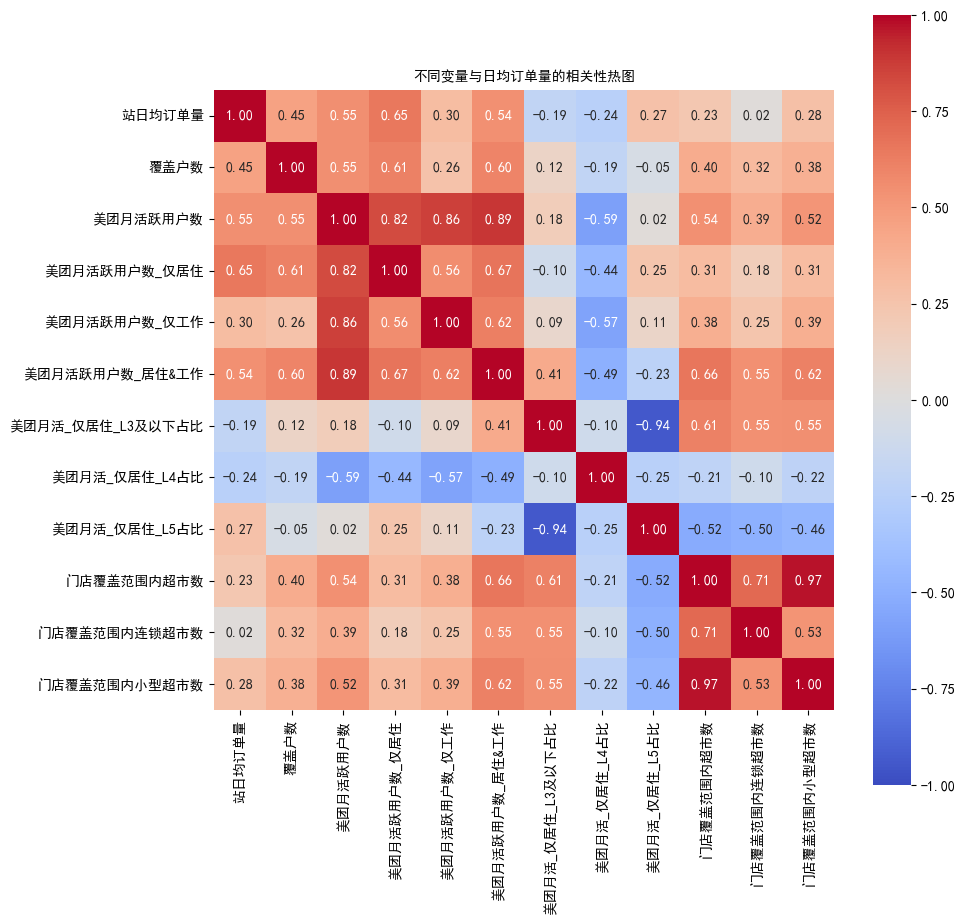

In [40]:
#热力图
df = df_sheet2[['站日均订单量','覆盖户数','美团月活跃用户数', '美团月活跃用户数_仅居住','美团月活跃用户数_仅工作', '美团月活跃用户数_居住&工作', '美团月活_仅居住_L3及以下占比', '美团月活_仅居住_L4占比','美团月活_仅居住_L5占比', '门店覆盖范围内超市数', '门店覆盖范围内连锁超市数', '门店覆盖范围内小型超市数']]
corr_matrix = df.corr()

# 设置图形大小
plt.figure(figsize=(10, 10))

# 绘制热图
sns.heatmap(corr_matrix, 
            annot=True,  # 显示相关性数值
            cmap='coolwarm',  # 颜色方案
            vmin=-1, vmax=1,  # 相关性范围
            center=0,  # 颜色中心点
            square=True,  # 每个单元格为正方形
            fmt='.2f')  # 数值格式，保留 2 位小数

# 设置标题
plt.title('不同变量与日均订单量的相关性热图', fontsize=10)

# 显示图形
plt.show()


In [41]:
df_sheet2['覆盖户数_weight'] = 0.53*df_sheet2['距离1.5km以内户数']+0.37*df_sheet2['距离1.5~2.1km户数']+0.26*df_sheet2['距离2.1~2.8km户数']+0.08*df_sheet2['距离2.8~3.8km户数']+0.04*df_sheet2['距离3.8km以上户数']

TypeError: can't multiply sequence by non-int of type 'float'

In [37]:
df_sheet2['覆盖户数_weight2'] = 0.35*df_sheet2['距离1.5km以内户数']+0.27*df_sheet2['距离1.5~2.1km户数']+0.24*df_sheet2['距离2.1~2.8km户数']+0.11*df_sheet2['距离2.8~3.8km户数']+0.03*df_sheet2['距离3.8km以上户数']

In [ ]:
correlation_ac = df_sheet2['站日均订单量_log'].corr(df_sheet2['覆盖户数_weight'])
print(f"相关性：{correlation_ac}")

In [ ]:
correlation_ac = df_sheet2['站日均订单量_log'].corr(df_sheet2['覆盖户数_weight2'])
print(f"相关性：{correlation_ac}")

In [40]:
df_sheet2['美团月活跃用户数_weight'] = 0.73*df_sheet2['美团月活跃用户数_仅居住']-0.15*df_sheet2['美团月活跃用户数_仅工作']+0.3*df_sheet2['美团月活跃用户数_居住&工作']

In [ ]:
correlation_ac = df_sheet2['站日均订单量_log'].corr(df_sheet2['美团月活跃用户数_weight'])
print(f"相关性：{correlation_ac}")

In [42]:
df_sheet2['美团月活跃用户数_weight2'] = 0.28*df_sheet2['美团月活跃用户数_仅工作_L3']+0.31*df_sheet2['美团月活跃用户数_仅工作_L4']+0.27*df_sheet2['美团月活跃用户数_仅工作_L5']+0.26*df_sheet2['美团月活跃用户数_居住&工作_L3']+0.60*df_sheet2['美团月活跃用户数_居住&工作_L4']+0.59*df_sheet2['美团月活跃用户数_居住&工作_L5']+0.25*df_sheet2['美团月活跃用户数_仅居住_L3']+0.63*df_sheet2['美团月活跃用户数_仅居住_L4']+0.56*df_sheet2['美团月活跃用户数_仅居住_L5']

In [ ]:
correlation_ac = df_sheet2['站日均订单量_log'].corr(df_sheet2['美团月活跃用户数_weight2'])
print(f"相关性：{correlation_ac}")

In [ ]:
'''
站日均订单量最相关的特征：1.美团月活用户数 2.覆盖户数
1.覆盖户数：距离越近越相关
2.美团月活用户数：仅居住>居住&工作>仅工作，居住属性相关性>工作属性
3.L3、L4反比,L5正比(低消费人群越多订单越少，高消费人群越多订单量越多)
4.门店覆盖范围内超市数？？为什么成正向关？ 相关性！=因果性
'''

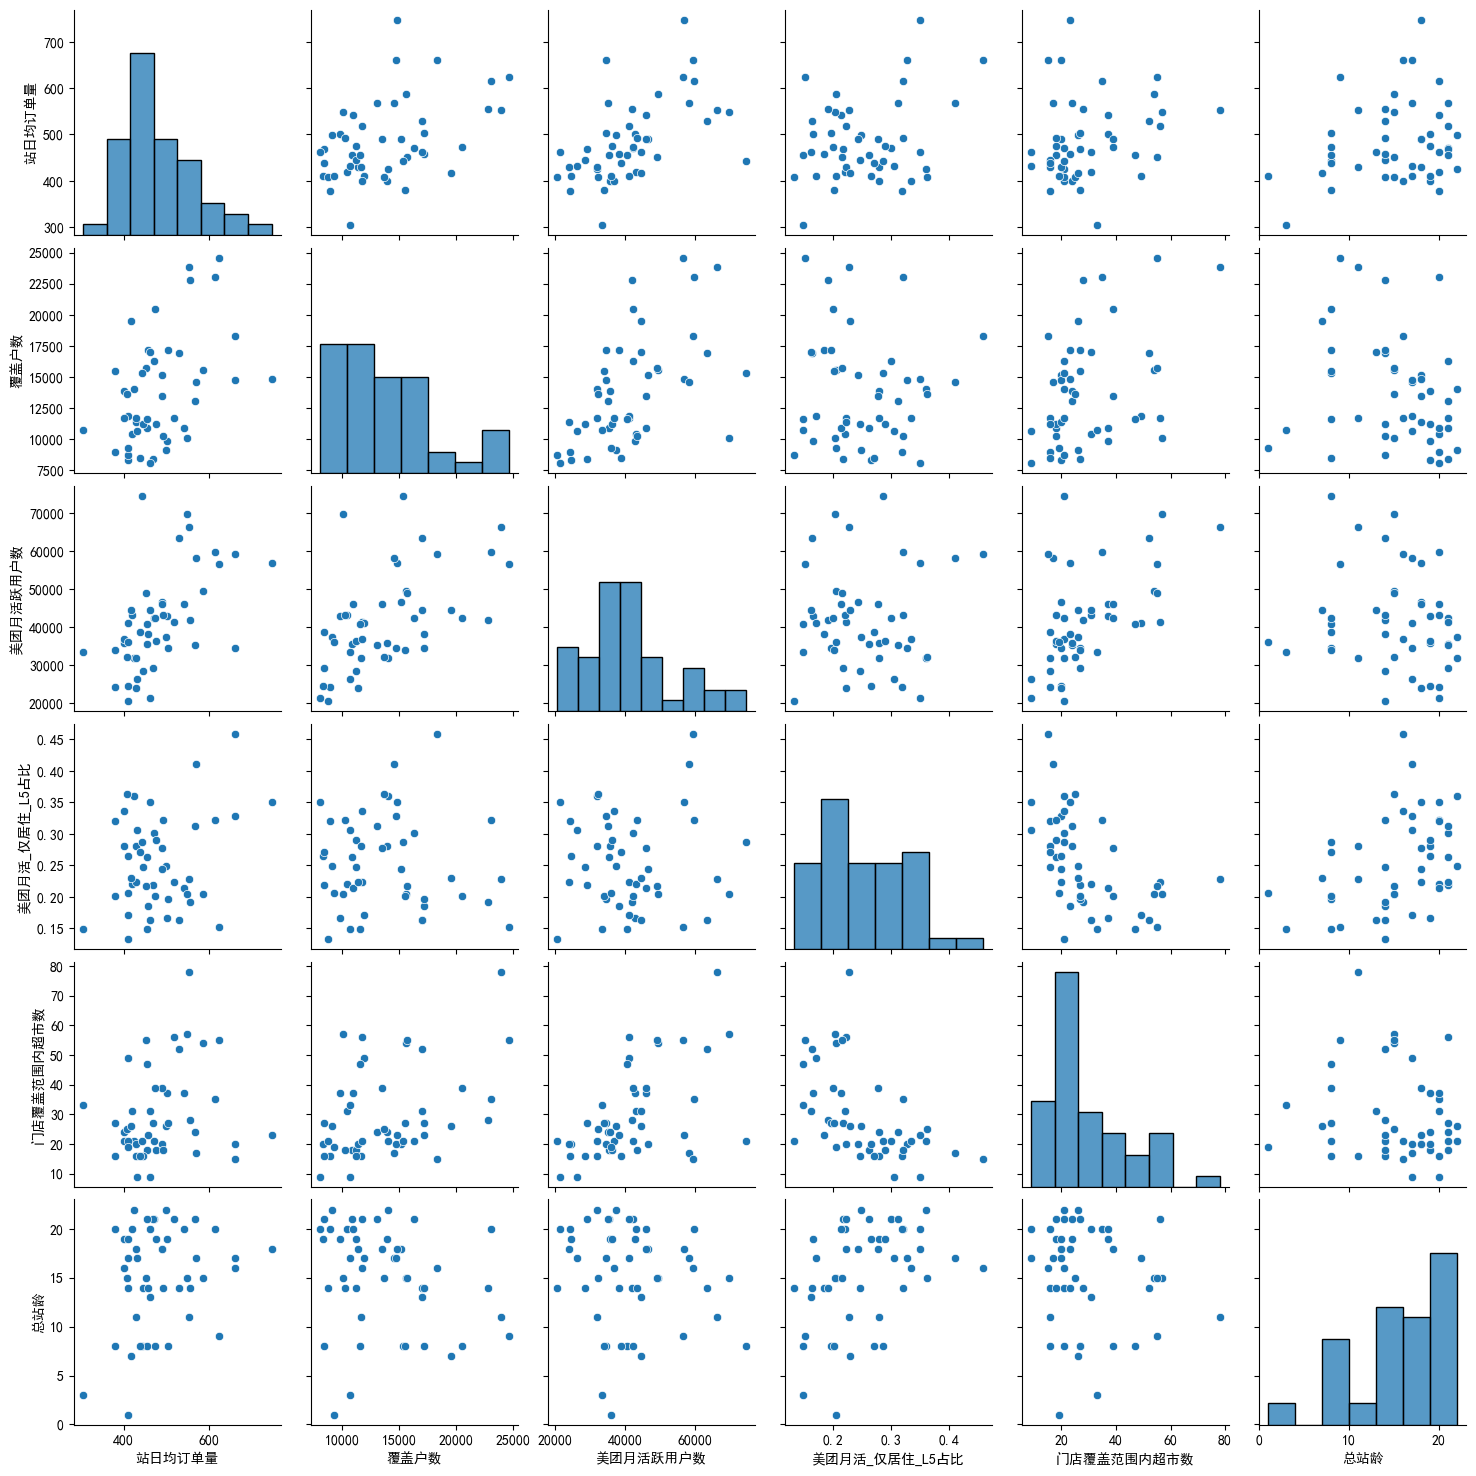

In [42]:
#scatterplot
# 设置支持中文的字体（例如 SimHei）
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
cols = ['站日均订单量', '覆盖户数', '美团月活跃用户数', '美团月活_仅居住_L5占比','门店覆盖范围内超市数','总站龄']
sns.pairplot(df_sheet2[cols], size = 2.5)
plt.show()

In [43]:
#scatterplot
# 设置支持中文的字体（例如 SimHei）
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
cols = ['站日均订单量_log', '覆盖户数_weight', '美团月活跃用户数_weight', '美团月活跃用户数_weight2']
sns.pairplot(df_sheet2[cols], size = 2.5)
plt.show()

KeyError: "['覆盖户数_weight', '美团月活跃用户数_weight', '美团月活跃用户数_weight2'] not in index"

In [1]:
df_sheet2.columns

NameError: name 'df_sheet2' is not defined

In [57]:
median_value = df_sheet2['覆盖户数'].median()
df_sheet2['覆盖户数分类'] = df_sheet2['覆盖户数'].apply(lambda x: '<中位数' if x < median_value else '>中位数')
median_value1 = df_sheet2['美团月活跃用户数'].median()
df_sheet2['美团月活跃用户数分类'] = df_sheet2['美团月活跃用户数'].apply(lambda x: '<中位数' if x < median_value1 else '>中位数')
median_value2 = df_sheet2['美团月活_仅居住_L5占比'].median()
df_sheet2['美团月活_仅居住_L5占比分类'] = df_sheet2['美团月活_仅居住_L5占比'].apply(lambda x: '<中位数' if x < median_value2 else '>中位数')
median_value3 = df_sheet2['门店覆盖范围内超市数'].median()
df_sheet2['门店覆盖范围内超市数分类'] = df_sheet2['门店覆盖范围内超市数'].apply(lambda x: '<中位数' if x < median_value3 else '>中位数')

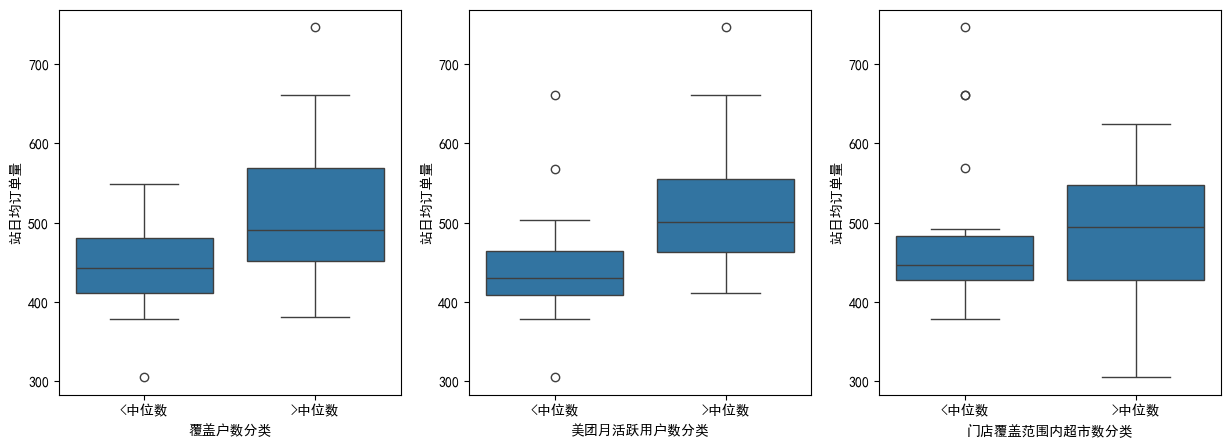

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
desired_order = ['<中位数','>中位数']
fig = sns.boxplot(y='站日均订单量', x='覆盖户数分类', data=df_sheet2,ax=axes[0])
fig = sns.boxplot(y='站日均订单量', x='美团月活跃用户数分类', data=df_sheet2,ax=axes[1])
fig = sns.boxplot(y='站日均订单量', x='门店覆盖范围内超市数分类', data=df_sheet2,ax=axes[2],order=desired_order)
plt.show()

In [ ]:
df_sheet2